## Bike Sharing Demand  

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 






In [521]:
#Supress warnings 
import warnings 
warnings.filterwarnings('ignore')

In [522]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 



#### Data Dictionary 

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Reading the input Data 

In [523]:
#Import the bike sharing dataset
sharing=pd.read_csv(r'G:\Upgrad_MachineLearning\Linear Regression Assignment\day.csv')

# Look sample data from the dataframe 

In [524]:

sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108470000,18.1812500000,80.5833000000,10.7498820000,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9025980000,17.6869500000,69.6087000000,16.6521130000,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509240000,9.4702500000,43.7273000000,16.6367030000,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000000000,10.6061000000,59.0435000000,10.7398320000,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052370000,11.4635000000,43.6957000000,12.5223000000,82,1518,1600


# look for the columns statistics 

In [525]:

sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Check for the mean median and 75th percentile of the dataframe

In [526]:

sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000,730.0000000000
mean,365.5000000000,2.4986301370,0.5000000000,6.5260273973,0.0287671233,2.9972602740,0.6835616438,1.3945205479,20.3192592170,23.7263216233,62.7651749315,12.7636196547,849.2493150685,3658.7575342466,4508.0068493151
std,210.8771364247,1.1101839528,0.5003428180,3.4502152931,0.1672659613,2.0061614695,0.4654050255,0.5448072389,7.5067289370,8.1503077622,14.2375890434,5.1958407041,686.4798745344,1559.7587279936,1936.0116473613
min,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,2.4243464000,3.9534800000,0.0000000000,1.5002439000,2.0000000000,20.0000000000,22.0000000000
25%,183.2500000000,2.0000000000,0.0000000000,4.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,13.8118852500,16.8897125000,52.0000000000,9.0416500000,316.2500000000,2502.2500000000,3169.7500000000
50%,365.5000000000,3.0000000000,0.5000000000,7.0000000000,0.0000000000,3.0000000000,1.0000000000,1.0000000000,20.4658265000,24.3682250000,62.6250000000,12.1253250000,717.0000000000,3664.5000000000,4548.5000000000
75%,547.7500000000,3.0000000000,1.0000000000,10.0000000000,0.0000000000,5.0000000000,1.0000000000,2.0000000000,26.8806147500,30.4457750000,72.9895750000,15.6255892500,1096.5000000000,4783.2500000000,5966.0000000000
max,730.0000000000,4.0000000000,1.0000000000,12.0000000000,1.0000000000,6.0000000000,1.0000000000,3.0000000000,35.3283470000,42.0448000000,97.2500000000,34.0000210000,3410.0000000000,6946.0000000000,8714.0000000000


## Check the shape of the dataframe 

In [527]:

sharing.shape

(730, 16)

## Data Exploration 

###  Check for the Percentage of null values in Column 

In [528]:

round(100*(sharing.isnull().sum()/len(sharing.index)),2).sort_values(ascending=False)

cnt          0.0000000000
registered   0.0000000000
casual       0.0000000000
windspeed    0.0000000000
hum          0.0000000000
atemp        0.0000000000
temp         0.0000000000
weathersit   0.0000000000
workingday   0.0000000000
weekday      0.0000000000
holiday      0.0000000000
mnth         0.0000000000
yr           0.0000000000
season       0.0000000000
dteday       0.0000000000
instant      0.0000000000
dtype: float64

### Check for row wise null value percentage 

In [1]:
round((sharing.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

NameError: name 'sharing' is not defined

We could see there is no  null values in this dataset 

### Check for duplicate data in the dataframe 

In [530]:

sharing_dup=sharing 
sharing_dup.drop_duplicates(subset=None,inplace=True)
sharing_dup.shape

(730, 16)

From the above output it is clear that there is no duplicate data found in this dataset 

### Check for Junk values by using value_counts() for the entire dataframe 

In [531]:

sharing_dummy=sharing.iloc[:,1:16]

for col in sharing_dummy:
    print(sharing_dummy[col].value_counts(),'/n')

10-06-2018    1
21-07-2019    1
20-12-2019    1
24-01-2019    1
13-02-2018    1
             ..
03-04-2018    1
07-01-2018    1
28-12-2019    1
23-10-2018    1
12-09-2019    1
Name: dteday, Length: 730, dtype: int64 /n
3    188
2    184
1    180
4    178
Name: season, dtype: int64 /n
1    365
0    365
Name: yr, dtype: int64 /n
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 /n
0    709
1     21
Name: holiday, dtype: int64 /n
6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 /n
1    499
0    231
Name: workingday, dtype: int64 /n
1    463
2    246
3     21
Name: weathersit, dtype: int64 /n
10.8991530000    5
26.0350000000    5
23.1308470000    4
28.5633470000    4
27.8800000000    4
                ..
27.0258470000    1
19.2700000000    1
13.1912990000    1
24.1558470000    1
5.5261030000     1
Name: temp, Length: 498, dtype: int64 /n
32.7344000000    4
18.7810500

There seems to be no Junk values in the dataframe. 

###  Removing unwanted columns from the dataframe based on the Data Dictionary given above

In [532]:

sharing.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Creating a new data frame with above columns removed 

In [533]:
sharing_new=sharing[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'
       , 'cnt']]
sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


### Convert the columns (mnth,weekday,season,weatherist) to Category dataype

In [534]:


category_cols=['mnth','weekday','season','weathersit']
for cols in category_cols:
    sharing_new[cols]=sharing_new[cols].astype('category')

### check the column info to see the change in dataype

In [535]:

sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


We have changed this columns to category, because 

The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data.

Reference : https://pbpython.com/pandas_dtypes_cat.html#:~:text=The%20category%20data%20type%20in,more%20efficiently%20store%20the%20data.

### Visualising the Data after peforming the Data Exploration 

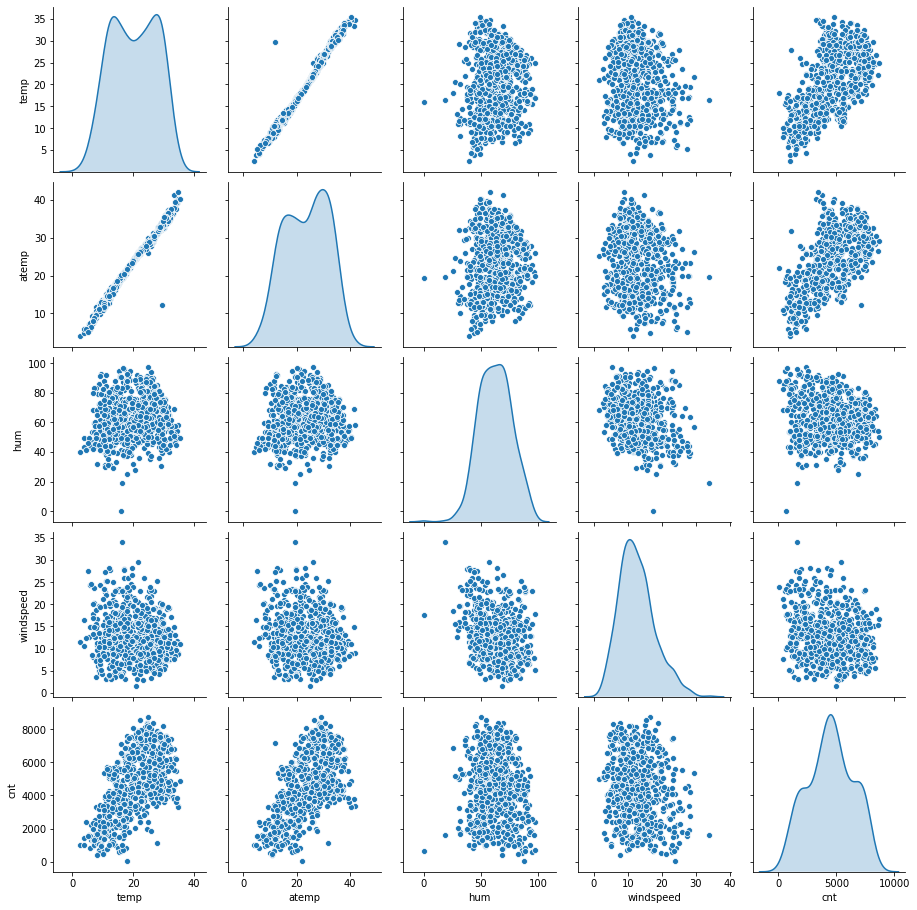

In [536]:
#Visualising the Numerical variables in the dataframe 
# Create a new dataframe of only numeric variables:

sharing_new_num=sharing_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(sharing_new_num, diag_kind='kde')
plt.show()

We could see a linear relationship between temp,atemp and cnt variables.

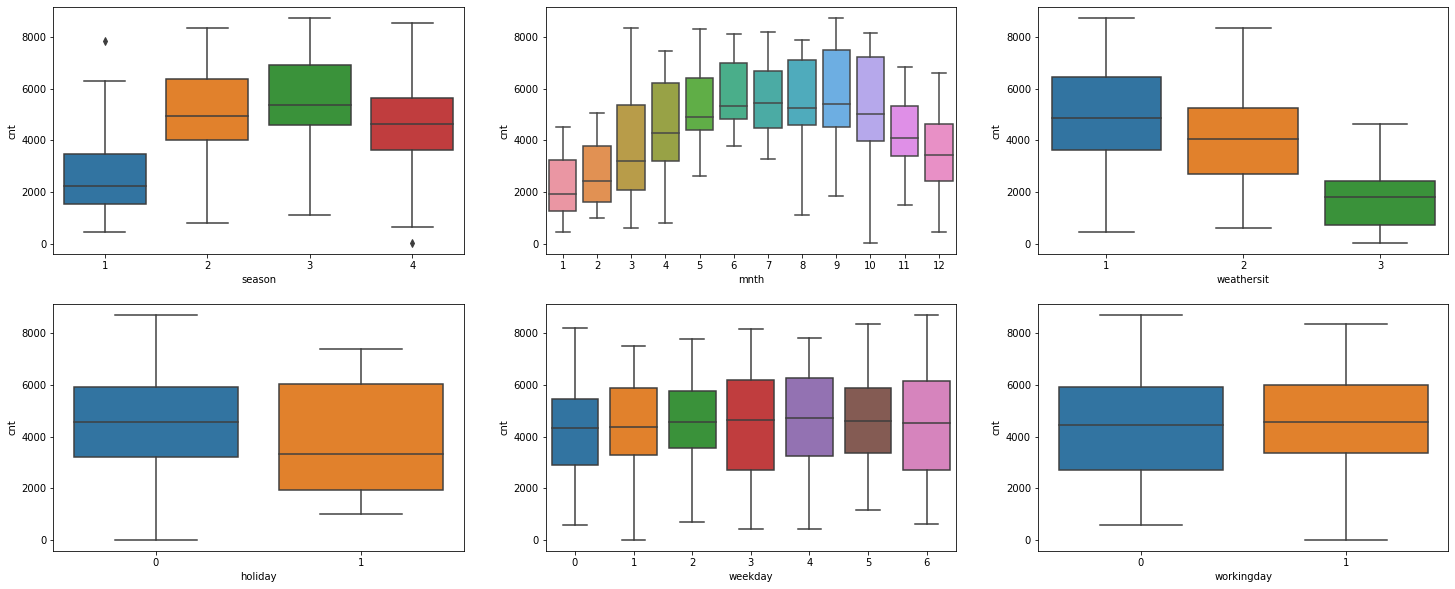

In [537]:
#Visualising the Categorical Variables 
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = sharing_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = sharing_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = sharing_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = sharing_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = sharing_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = sharing_new)
plt.show()

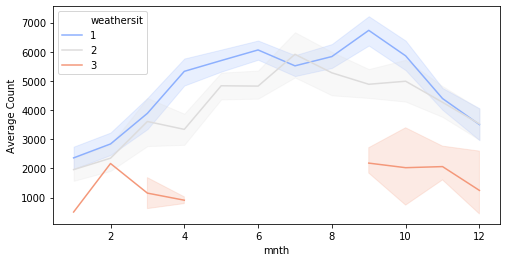

In [538]:
# Visualising how weathersituation impacts in bikesharing

plt.figure(figsize = (8,4))
sns.lineplot(x = 'mnth', y = 'cnt', data = sharing_new, estimator = np.average, hue = 'weathersit', palette = 'coolwarm')
plt.ylabel('Average Count')
plt.show()


+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

[Text(0, 0, 'spring'),
 Text(0, 0, 'summer'),
 Text(0, 0, 'fall'),
 Text(0, 0, 'winter')]

<Figure size 576x288 with 0 Axes>

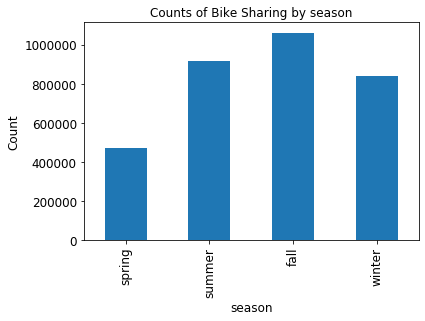

In [539]:
#visualising how season impacts bikesharing 
plt.figure(figsize = (8,4))
season= sharing_new[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Sharing by season", 
                                         stacked=True, fontsize=12)
season.set_xlabel("season", fontsize=12)
season.set_ylabel("Count", fontsize=12)
season.set_xticklabels(['spring','summer','fall','winter'])

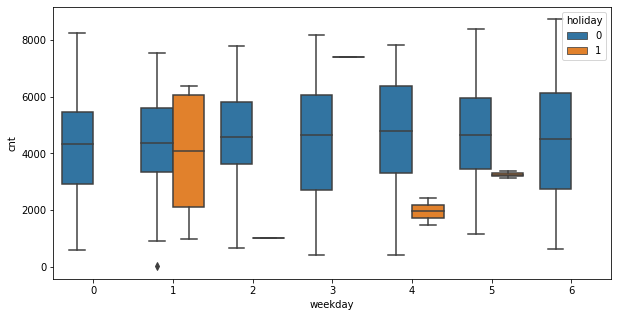

In [540]:
#Visualisation of Bikesharing in weekday and holiday 
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'holiday', data = sharing_new)
plt.show()

+ Weekday : 
		- 0:  Sunday 
		- 1:  Monday
		- 2:  Tuesday
		- 3:  Wednesday
		- 4:  Thursday
		- 5:  Friday 
		- 6:  Saturday
            

            
+ Holiday :
        - 0:  No 
		- 1:  Yes

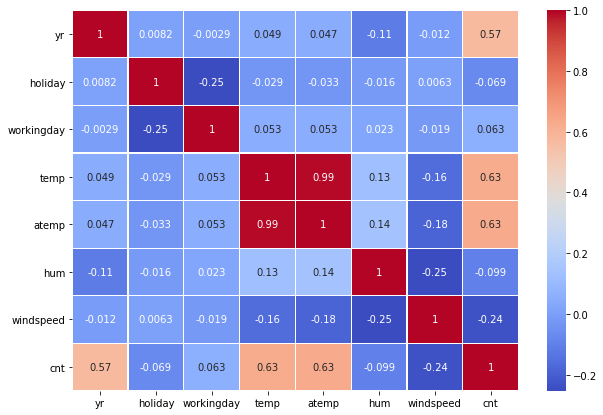

In [541]:
#Visualisation of heat map to see data correlation in sharing_new dataframe 
#Note this visualisation is done before regression just to check the collinearity of different variables 
plt.figure(figsize = (10,7))
sns.heatmap(sharing_new.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)


From the above heatmap we could see temp and atemp have high correlation. 

In [542]:
# Creating dummies for the categorical columns in the sharing_new dataframe 
sharing_new=pd.get_dummies(sharing_new,drop_first=True)
sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [543]:
# We specify random_state so that the train and test data set always have the same rows
np.random.seed(0)
df_train,df_test=train_test_split(sharing_new,train_size=0.70,test_size=0.30,random_state=100)


In [544]:
#verifying the  shape of training dataframe
df_train.shape

(510, 30)

In [545]:
#verifying the sample of training dataframe 
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.2016530000,23.0423000000,55.8333000000,12.2088070000,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.2466530000,33.1448000000,70.4167000000,11.0834750000,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.9808470000,20.6746000000,62.1250000000,10.7922930000,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.4891530000,11.5850000000,48.3333000000,23.5005180000,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.4433470000,18.8752000000,48.9583000000,8.7083250000,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [546]:
#verifying the columns of Training dataframe 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

In [547]:
#verifying the shape of test dataframe 
df_test.shape

(219, 30)

In [548]:
#verifying the sample of test dataframe 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,29.7933470000,33.2708500000,63.7917000000,5.4591064000,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.0825000000,36.0487500000,59.2083000000,7.6254040000,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.2700000000,22.8523000000,81.2917000000,13.2501210000,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.4333470000,34.2491500000,42.4167000000,13.4172860000,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.3150000000,32.1971000000,30.5000000000,19.5832290000,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [549]:
#verifying the columns of test dataframe 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

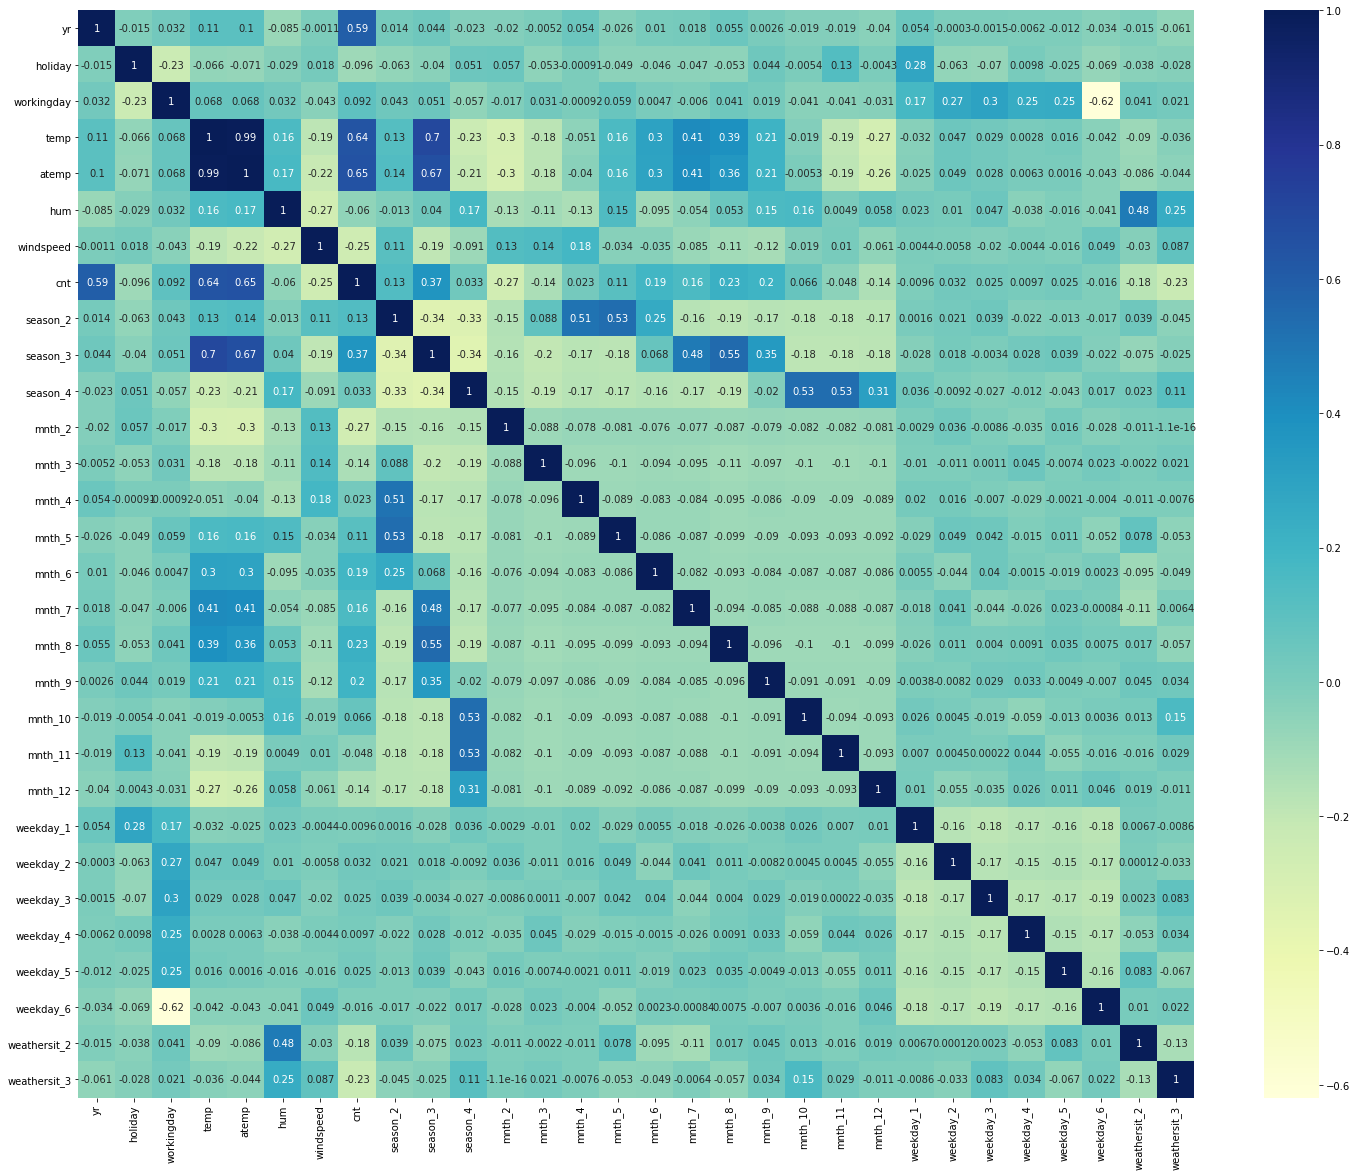

In [550]:
#Visualising the correlation after creating dummies in the sharing_new dataframe 
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

1) temp,atemp and season3 have a high correlation factor 
2) yr and cnt have a high  correlation. 

In [551]:
#Rescaling the features inorder to have comparable scales 
scaler=MinMaxScaler()

In [552]:
#Check the data before scaling 
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.2016530000,23.0423000000,55.8333000000,12.2088070000,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.2466530000,33.1448000000,70.4167000000,11.0834750000,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.9808470000,20.6746000000,62.1250000000,10.7922930000,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.4891530000,11.5850000000,48.3333000000,23.5005180000,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.4433470000,18.8752000000,48.9583000000,8.7083250000,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [553]:
#Retrieve the columns in df_train 
df_train.columns 

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [554]:
# Apply scaler() to all the numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [555]:
#Check the data after scaling 
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.5098865273,0.5011330665,0.5753536882,0.3007936214,0.8642429821,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.8151685543,0.7663509692,0.7256334133,0.2646855224,0.8276576162,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.4423930323,0.4389745485,0.6401887024,0.2553424766,0.4652554073,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.2451010957,0.2003480058,0.4980673257,0.6631064488,0.2040957202,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.3956661914,0.3917354400,0.5045078559,0.1884749896,0.4829728486,1,0,...,0,0,0,0,0,0,0,1,1,0


In [556]:
#check the mean median and other statistics 
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,...,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000,510.0000000000
mean,0.5078431373,0.0254901961,0.6764705882,0.5372623985,0.5129890345,0.6503691267,0.3207679003,0.5136196909,0.2450980392,0.2627450980,...,0.0862745098,0.0843137255,0.1509803922,0.1313725490,0.1588235294,0.1333333333,0.1274509804,0.1549019608,0.3431372549,0.0294117647
std,0.5004293391,0.1577632670,0.4682820818,0.2258439252,0.2123853286,0.1458819464,0.1697969914,0.2245925838,0.4305676454,0.4405572397,...,0.2810446467,0.2781305463,0.3583812926,0.3381390166,0.3658703167,0.3402683944,0.3338048978,0.3621664378,0.4752229968,0.1691236137
min,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.0000000000,0.0000000000,0.0000000000,0.3398528491,0.3320856956,0.5386429236,0.1991788611,0.3564196963,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,1.0000000000,0.0000000000,1.0000000000,0.5405193981,0.5268108325,0.6537138158,0.2967627400,0.5186378279,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,1.0000000000,0.0000000000,1.0000000000,0.7352145684,0.6884565828,0.7548303977,0.4144467438,0.6847100782,0.0000000000,1.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000
max,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,...,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


## Model Building 

In [557]:
#Dividing into X and Y sets for the model building
y_train=df_train.pop('cnt')
X_train=df_train

#### Recursive feature Elimination 

In [558]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [559]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [560]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [561]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

## Model 1

In [562]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [563]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [564]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [565]:
# Check the parameters 
lm.params

const           0.1950044922
yr              0.2300659621
holiday        -0.0546250003
workingday      0.0446339206
temp            0.4959943876
hum            -0.1622555542
windspeed      -0.1824166302
season_2        0.1174784584
season_3        0.0294931168
season_4        0.1430478582
mnth_8          0.0474518719
mnth_9          0.1177839385
mnth_10         0.0442291075
weekday_6       0.0533064173
weathersit_2   -0.0591806418
weathersit_3   -0.2523396788
dtype: float64

In [566]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.89e-191
Time:                        18:12:16   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

#### The P value of season_3 and mnth_10 seems to be high and insignificant . Let's calculate the Variance inflation factor to see whether we can drop the variable 

In [567]:
# Check columns of train dataframe 
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [568]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#drop const from X_train_refe
X_train_rfe_VIF=X_train_rfe[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6', 'weathersit_2', 'weathersit_3']]
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_VIF.values, i) for i in range(X_train_rfe_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.0600000000
4,hum,17.4700000000
7,season_3,8.1900000000
2,workingday,5.0500000000
5,windspeed,3.8800000000
6,season_2,3.4400000000
8,season_4,2.8800000000
13,weathersit_2,2.1500000000
0,yr,2.0400000000
12,weekday_6,1.9000000000


From the VIF Calculation we are evident that the 'season_3' is insignificant because of VIF more than 5 and also P value greater than 0.05. 

season_3 
P-Value : 0.179
VIF     : 6.04

####  Hence, we will be dropping the column season_3

In [569]:
#Removing the variable 'season_3' based on its High p-value & High VIF
X_train_new = X_train_rfe_VIF.drop(["season_3"], axis = 1)

## Model 2 

In [570]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.5900000000
3,temp,10.0100000000
2,workingday,5.0500000000
5,windspeed,3.8200000000
7,season_4,2.2700000000
12,weathersit_2,2.1400000000
0,yr,2.0300000000
11,weekday_6,1.9000000000
6,season_2,1.8300000000
10,mnth_10,1.6200000000


In [571]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [572]:
# Check the parameters obtained

lr2.params

const           0.1945404093
yr              0.2291532766
holiday        -0.0558482276
workingday      0.0443550762
temp            0.5300657424
hum            -0.1692123293
windspeed      -0.1857098295
season_2        0.1039280366
season_4        0.1348168116
mnth_8          0.0559810573
mnth_9          0.1254515223
mnth_10         0.0410913093
weekday_6       0.0529214035
weathersit_2   -0.0582266398
weathersit_3   -0.2485956047
dtype: float64

In [573]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.24e-192
Time:                        18:12:17   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

 Here we remove 'holiday' Since it has a high p value comparitively though the VIF of holiday is less than 2.5 

In [574]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

### Model3 

In [575]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.0900000000
2,temp,10.0100000000
1,workingday,4.5500000000
4,windspeed,3.7600000000
6,season_4,2.2700000000
11,weathersit_2,2.1300000000
0,yr,2.0300000000
5,season_2,1.8200000000
10,weekday_6,1.7900000000
9,mnth_10,1.6100000000


In [576]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [577]:
# Check the parameters obtained

lr3.params

const           0.1847804338
yr              0.2293233418
workingday      0.0526632260
temp            0.5316510145
hum            -0.1682521755
windspeed      -0.1865468769
season_2        0.1046487429
season_4        0.1340817754
mnth_8          0.0563522888
mnth_9          0.1237064489
mnth_10         0.0423367018
weekday_6       0.0613437836
weathersit_2   -0.0579406586
weathersit_3   -0.2478155628
dtype: float64

In [578]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.86e-192
Time:                        18:12:18   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1848      0.028      6.496   

Here we see that 'mnth_10' has comparitively high P Value when compared to others though the VIF is 1.49. We remove it considering it as insignificant to see a new model 

In [579]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

## Model 4 

In [580]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.0500000000
2,temp,9.7600000000
1,workingday,4.5300000000
4,windspeed,3.7600000000
10,weathersit_2,2.1200000000
0,yr,2.0200000000
5,season_2,1.8200000000
9,weekday_6,1.7900000000
6,season_4,1.7500000000
7,mnth_8,1.5900000000


In [581]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [582]:
# Check the parameters obtained

lr4.params

const           0.1772716907
yr              0.2290831044
workingday      0.0519698645
temp            0.5413451548
hum            -0.1635976931
windspeed      -0.1830075092
season_2        0.1026847685
season_4        0.1482829658
mnth_8          0.0526040200
mnth_9          0.1173659140
weekday_6       0.0607489005
weathersit_2   -0.0575872627
weathersit_3   -0.2421255879
dtype: float64

In [583]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.47e-192
Time:                        18:12:19   Log-Likelihood:                 513.83
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1773      0.028      6.236   

Here, we try to remove the column 'mnth_8' since it has a P value high when compared to other variables in the model though the VIF is 1.44 and also the Pvalue is less than 0.05  we consider it as high and to check a new model whether it will be best suited model or not 

In [584]:
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

## Model 5

In [585]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.9800000000
2,temp,8.1200000000
1,workingday,4.5300000000
4,windspeed,3.7300000000
9,weathersit_2,2.1000000000
0,yr,2.0200000000
8,weekday_6,1.7900000000
6,season_4,1.6600000000
5,season_2,1.5800000000
7,mnth_9,1.2000000000


In [586]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [587]:
# Check the parameters obtained

lr5.params

const           0.1698211073
yr              0.2294373524
workingday      0.0535574222
temp            0.5708795218
hum            -0.1612820926
windspeed      -0.1860782453
season_2        0.0899144125
season_4        0.1406518694
mnth_9          0.1025414465
weekday_6       0.0630471922
weathersit_2   -0.0553138787
weathersit_3   -0.2438898320
dtype: float64

In [588]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        18:12:20   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1698      0.029      5.937   

Since, All the Pvalues seems to be 0 from the above summary and also since they are represented only upto three decimal points. We will be extracting the p values seperately to check for insignificance 

In [589]:
#Checking the Pvalues
pd.options.display.float_format = '{:.10f}'.format
round(lr5.pvalues,6)

const          0.0000000000
yr             0.0000000000
workingday     0.0000010000
temp           0.0000000000
hum            0.0000210000
windspeed      0.0000000000
season_2       0.0000000000
season_4       0.0000000000
mnth_9         0.0000000000
weekday_6      0.0000110000
weathersit_2   0.0000000000
weathersit_3   0.0000000000
dtype: float64

From the above extract of P values for Model 5 . We could clearly see that 'hum' has high p values when compared to other variables and VIF is pretty high for 'hum'. So, we will drop the hum and see.

In [590]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

## Model 6

In [591]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.7600000000
1,workingday,4.0400000000
3,windspeed,3.4300000000
0,yr,2.0200000000
7,weekday_6,1.6900000000
4,season_2,1.5700000000
8,weathersit_2,1.5300000000
5,season_4,1.4000000000
6,mnth_9,1.2000000000
9,weathersit_3,1.0800000000


In [592]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [593]:
# Check the parameters obtained

lr6.params

const           0.0753250334
yr              0.2330563917
workingday      0.0563225358
temp            0.5499359190
windspeed      -0.1552383940
season_2        0.0874287455
season_4        0.1318261730
mnth_9          0.0972358354
weekday_6       0.0676882785
weathersit_2   -0.0813468035
weathersit_3   -0.2880211591
dtype: float64

In [594]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        18:12:21   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051   

In [595]:
## Check for p values in the above model 
pd.options.display.float_format = '{:.10f}'.format
round(lr6.pvalues,6)

const          0.0000590000
yr             0.0000000000
workingday     0.0000010000
temp           0.0000000000
windspeed      0.0000000000
season_2       0.0000000000
season_4       0.0000000000
mnth_9         0.0000000000
weekday_6      0.0000030000
weathersit_2   0.0000000000
weathersit_3   0.0000000000
dtype: float64

We could see that 'working day have a distinctive p value and hig  VIF we will drop the working day and see how the next model is '

In [596]:
# Drop working day variable 
X_train_new = X_train_new.drop(["workingday"], axis = 1)

## Model 7 

In [597]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.7000000000
2,windspeed,3.0900000000
0,yr,2.0000000000
3,season_2,1.5600000000
7,weathersit_2,1.4800000000
4,season_4,1.3700000000
5,mnth_9,1.2000000000
6,weekday_6,1.1800000000
8,weathersit_3,1.0800000000


In [598]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [599]:
# Check the parameters obtained

lr7.params

const           0.1178897665
yr              0.2335946823
temp            0.5536495652
windspeed      -0.1574935890
season_2        0.0884827795
season_4        0.1292691554
mnth_9          0.0976862195
weekday_6       0.0227334333
weathersit_2   -0.0782377468
weathersit_3   -0.2802151221
dtype: float64

In [600]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.09e-184
Time:                        18:12:22   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     500   BIC:                            -910.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1179      0.017      6.945   

In [601]:
## Check for p values in the above model 
pd.options.display.float_format = '{:.10f}'.format
round(lr7.pvalues,6)

const          0.0000000000
yr             0.0000000000
temp           0.0000000000
windspeed      0.0000000000
season_2       0.0000000000
season_4       0.0000000000
mnth_9         0.0000000000
weekday_6      0.0496310000
weathersit_2   0.0000000000
weathersit_3   0.0000000000
dtype: float64

We will drop weekday_6 as well due to distinctive p value though VIF is less than 2 

In [602]:
# Drop working day variable 
X_train_new = X_train_new.drop(["weekday_6"], axis = 1)

## Model 8 

In [603]:
# Calculating the VIF for the model 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.6800000000
2,windspeed,3.0300000000
0,yr,2.0000000000
3,season_2,1.5600000000
6,weathersit_2,1.4700000000
4,season_4,1.3700000000
5,mnth_9,1.2000000000
7,weathersit_3,1.0800000000


In [604]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [605]:
# Check the parameters obtained

lr8.params

const           0.1213919817
yr              0.2331078374
temp            0.5527253508
windspeed      -0.1552596943
season_2        0.0881757895
season_4        0.1294022984
mnth_9          0.0976978535
weathersit_2   -0.0780443577
weathersit_3   -0.2794924142
dtype: float64

In [606]:
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.04e-185
Time:                        18:12:23   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1214      0.017      7.170   

In [607]:
## Check for p values in the above model 
pd.options.display.float_format = '{:.10f}'.format
round(lr8.pvalues,6)

const          0.0000000000
yr             0.0000000000
temp           0.0000000000
windspeed      0.0000000000
season_2       0.0000000000
season_4       0.0000000000
mnth_9         0.0000000000
weathersit_2   0.0000000000
weathersit_3   0.0000000000
dtype: float64

All the P values seems to be signigicant now. And the VIF is also less than the 5.

We will consider the lr8 as the final train model for our prediction 

### Final Model Interpretation 

#### Hypothesis Test

From the above interpretation of the Coeff we could see that none of them are equal to 0 . We are clearly evident that the we reject the null hypothesis

## F-statistics

##### The F-statistics and Prob(f-statistics) for the final model 

The Fstatistics for the final model is 297.4 and the Prob (F-statistic):  8.04e-185 ( Which is a very low value) . 

Since the value is very low. We consider this as the Significant model. 

## Validation of assumptions 


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [608]:
## Residual Analysis of Training Data 
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

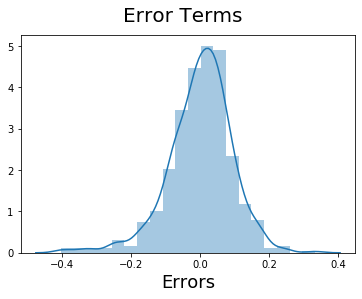

In [609]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid

### There is a linear relationship between X and Y

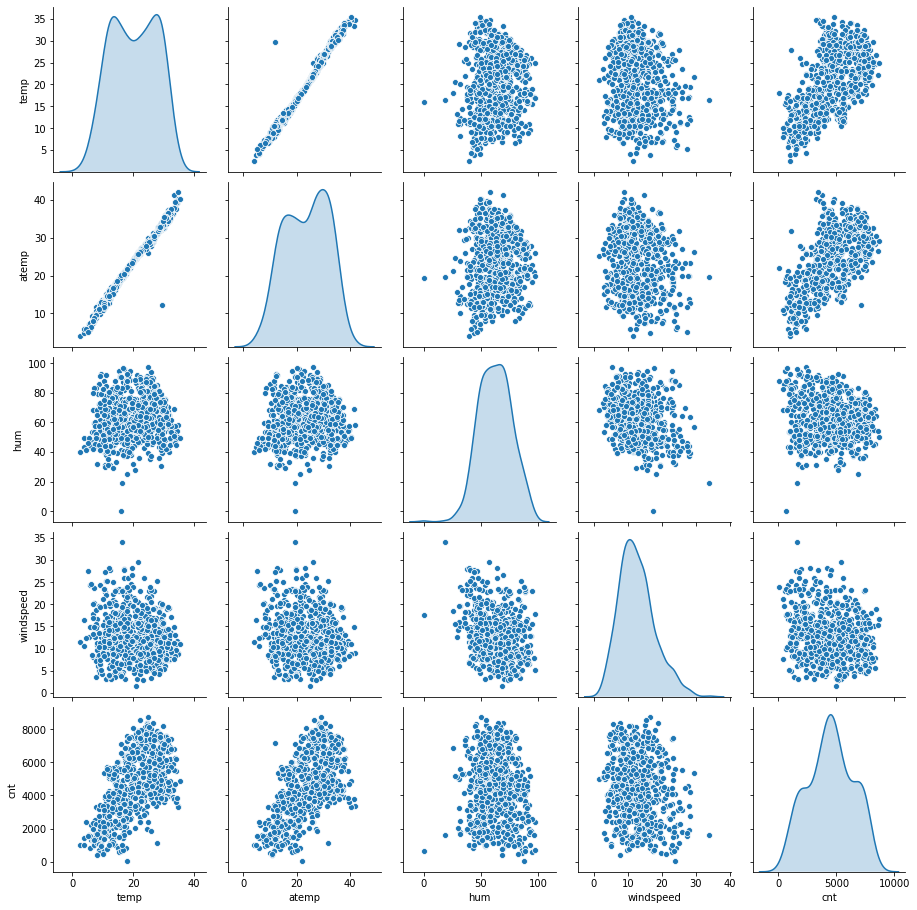

In [610]:
sharing_lin=sharing_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(sharing_lin, diag_kind='kde')
plt.show()

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’

### There is No Multicollinearity between the predictor variables¶

In [611]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.6800000000
2,windspeed,3.0300000000
0,yr,2.0000000000
3,season_2,1.5600000000
6,weathersit_2,1.4700000000
4,season_4,1.3700000000
5,mnth_9,1.2000000000
7,weathersit_3,1.0800000000


#### From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [612]:
# Apply scaler() to all numeric variables in test dataset. 

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [613]:
# Checking the sample data from the test dataframe 
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.8317833729,0.7696601220,0.6573637931,0.0842185507,0.6927059365,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.9013540317,0.8425874976,0.6101325513,0.1537277162,0.7120340543,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.5119636911,0.4961450535,0.8376986388,0.3342058669,0.3033824206,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.8816253365,0.7953431385,0.4370976601,0.3395696265,0.5473999080,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.8172457181,0.7414712853,0.3142978740,0.5374138896,0.5690289922,1,0,...,0,0,0,0,0,1,0,0,0,0


In [614]:
# Check for the mean meadian and the other stats from the test dataframe 
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,...,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000,219.0000000000
mean,0.4794520548,0.0365296804,0.6986301370,0.5589408724,0.5329914559,0.6385078028,0.3133498657,0.5205915480,0.2648401826,0.2465753425,...,0.0730593607,0.0867579909,0.1278538813,0.1643835616,0.1004566210,0.1643835616,0.1780821918,0.1187214612,0.3196347032,0.0273972603
std,0.5007221127,0.1880337974,0.4599042034,0.2336980368,0.2178879887,0.1489737798,0.1599472475,0.2184346100,0.4422589501,0.4320047756,...,0.2608300989,0.2821249493,0.3346920488,0.3714723481,0.3012965434,0.3714723481,0.3834583965,0.3242015033,0.4674033815,0.1636119884
min,0.0000000000,0.0000000000,0.0000000000,0.0465913953,0.0259501377,0.2619152385,-0.0428079615,0.0482052462,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.0000000000,0.0000000000,0.0000000000,0.3546499935,0.3447509826,0.5272650829,0.1985167216,0.3775310630,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
50%,0.0000000000,0.0000000000,1.0000000000,0.5586905320,0.5491978225,0.6277373541,0.2994585935,0.5242751956,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
75%,1.0000000000,0.0000000000,1.0000000000,0.7590963453,0.7141323798,0.7439281257,0.4030479484,0.6727450529,1.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000
max,1.0000000000,1.0000000000,1.0000000000,0.9844243864,0.9809339766,1.0021464999,0.8074743507,0.9632995858,1.0000000000,1.0000000000,...,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000


In [615]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test


In [616]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [617]:
#Check shape 
X_test.shape

(219, 29)

In [618]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [619]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
col1

Index(['yr', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_9',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [620]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col1]

# Adding a constant variable 
X_test_lm8 = sm.add_constant(X_test_new)

In [621]:
#Check the info of X_tes_lm6
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_2  219 non-null    uint8  
 8   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.6 KB


In [622]:
# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

## MODEL EVALUATION

Text(0, 0.5, 'y_pred')

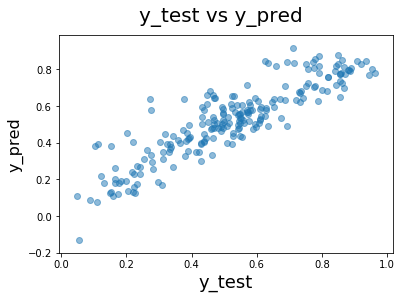

In [623]:
# Plotting y_test and y_pred to understand the linearity 

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

## R^2 Value for TEST

In [624]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7906228342366496

## Adjusted R^2 Value for TEST

#### Formula for Adjusted R^2

R2adj.=1−(1−R2)∗n−1n−p−1

In [625]:

# We already have the value of R^2 (calculated in above step)

rsq_pred=0.7906228342366496

In [626]:
# Get the shape of X_test

X_test.shape

(219, 29)

In [627]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2_pred = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_pred

0.7642190868982646

## Final Result Comparison with R Square and Adjusted Rsquare values from Train and Predicted set 

In [628]:
#comparing R Square and Adjusted R square from the final train and predicted model(test model)
rsq_train= lr8.rsquared
rsq_adj_train=lr8.rsquared_adj
print("rsq_train         :",rsq_train)
print("rsq_adj_train     :",rsq_adj_train)
print("rsq_pred          :",rsq_pred)
print("adjusted_r2_pred  :",adjusted_r2_pred)


rsq_train         : 0.8260531156947925
rsq_adj_train     : 0.8232755207358271
rsq_pred          : 0.7906228342366496
adjusted_r2_pred  : 0.7642190868982646


There is a 6% drop in the predicted adjusted R square and the  train adjusted R square when comparing with the train set. Which seems to be a significant drop.

## Conclusion : 

As per our final Model, the top 3 predictor variables that influences the bike Sharing demand are:
    
    - Temperature (temp) - A coefficient value of ‘0.5527253508’ indicated that a unit increase in temp variable increases the bike share demand numbers by 0.5527253508 units.
 
    -  Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2794924142’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike share demand numbers by -0.2794924142 units
    
    -  Year (yr) - A coefficient value of ‘0.2331078374’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2331078374 units
    
#### SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM Demand 